In [21]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [2]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
#pyo.init_notebook_mode()


#configure_plotly_browser_state()

pyo.init_notebook_mode(connected=True)

In [22]:
dea_types = ["IO_VRS", "OO_CRS", "OO_VRS", "IO_CRS"]
dea_list = ["US22", "S22","US55","S55"]

for t in dea_list:
    
    exec(f"{t} = pd.read_excel('Data/{t}.xlsx', index_col=0)")
    
    for i, d in enumerate(dea_types):
        
        exec(f"{t}_{d} = pd.read_excel('Data/{t}_Solution.xlsx', index_col=0, header=[1], nrows=1000, skiprows = i * 1000 + i * 2)")
        

In [23]:
dfs_data = [US22, S22, US55, S55]

dfs_es = [US22_IO_VRS, US22_OO_CRS, US22_OO_VRS, US22_IO_CRS,
      S22_IO_VRS, S22_OO_CRS, S22_OO_VRS, S22_IO_CRS,
      US55_IO_VRS, US55_OO_CRS, US55_OO_VRS, US55_IO_CRS,
      S55_IO_VRS, S55_OO_CRS, S55_OO_VRS, S55_IO_CRS]

### US22_IO_VRS 

In [27]:
X = dfs_data[0]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,151.42,324.96,303.04,321.64
DMU 2,234.02,516.63,235.08,248.36
DMU 3,184.48,510.16,183.22,338.86
DMU 4,208.45,476.52,251.44,299.36
DMU 5,357.47,375.87,327.81,282.08


In [20]:
mitosheet.sheet(X, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-49432fa0-6ef8-4102-a0e3-54f27e033784", "code": {"imports…

In [ ]:
y = dfs_es[0]
y.head()

In [29]:
mitosheet.sheet(y, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-1cf25f1b-0ed7-4fc9-bf5d-7ed4db0621d0", "code": {"imports…

In [30]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002184376088244929
neg_root_mean_squared_error: -0.04655673241541188
r2: 0.8239035428870964


In [31]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0015992295165272994
neg_root_mean_squared_error: -0.03911462836356606
r2: 0.8744651091942817


In [32]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.001227791754644722
neg_root_mean_squared_error: -0.03474405006082483
r2: 0.9009677565586367


In [33]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0007885908256296545
neg_root_mean_squared_error: -0.02732275641186054
r2: 0.9380367086863819


In [34]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.000440481596768272
neg_root_mean_squared_error: -0.020861392752457058
r2: 0.9642383496950885


In [35]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0020419088053296114
neg_root_mean_squared_error: -0.04494517338937362
r2: 0.8356445647785469


In [36]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.005015068218399024
neg_root_mean_squared_error: -0.07075858991254506
r2: 0.5935202489578921


In [37]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0004896416779675232
neg_root_mean_squared_error: -0.022213007490738502
r2: 0.9603305212964249


In [38]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0001745313223957783
neg_root_mean_squared_error: -0.013096150727647759
r2: 0.9859085110429298


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.7171,0.7384,-0.0213,-2.8851,True
1,0.7413,0.7338,0.0075,1.0212,True
2,0.7260,0.7223,0.0037,0.5087,True
3,0.5324,0.5325,-0.0000,-0.0091,True
4,0.5134,0.5162,-0.0028,-0.5337,True
...,...,...,...,...,...
195,0.7130,0.7193,-0.0063,-0.8702,True
196,0.6582,0.6557,0.0025,0.3761,True
197,0.5877,0.5859,0.0019,0.3168,True
198,0.7836,0.8051,-0.0214,-2.6614,True


In [40]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

184


16

In [41]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.677801    0.680476   -0.002675   -0.247149
std      0.113849    0.120285    0.016103    1.978677
min      0.468000    0.455700   -0.139700  -14.483600
25%      0.585150    0.586800   -0.007150   -1.132400
50%      0.661900    0.660800   -0.001550   -0.264150
75%      0.733400    0.738400    0.004375    0.713675
max      0.996400    1.000000    0.032200    4.354700


In [42]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.994
p-Value 0.0


In [63]:
df_res

{'US22':                                                 Model          Metric   Value
 0                                    LinearRegression            RMSE  0.0466
 1                                                 NaN              R2  0.8239
 2                               DecisionTreeRegressor            RMSE  0.0384
 3                                                 NaN              R2  0.8759
 4                                 KNeighborsRegressor            RMSE  0.0347
 5                                                 NaN              R2  0.9010
 6                               RandomForestRegressor            RMSE  0.0276
 7                                                 NaN              R2  0.9368
 8                           GradientBoostingRegressor            RMSE  0.0209
 9                                                 NaN              R2  0.9644
 10  LinearRegression w/ \nPolynomialFeatures(degre...            RMSE  0.0131
 11                                         

In [68]:
df_res = pd.read_excel("Results.xlsx", header=1, usecols="B:D", sheet_name=None)

US22, S22, US55, S55  = df_res["US22"].fillna(method="ffill"), df_res["S22"].fillna(method="ffill"), df_res["US55"].fillna(method="ffill"), df_res["S55"].fillna(method="ffill")

mitosheet.sheet(US22, S22, US55, S55)

MitoWidget(analysis_data_json='{"analysisName": "UUID-daaad89d-190b-4559-bcef-d785a5c1d6d9", "code": {"imports…

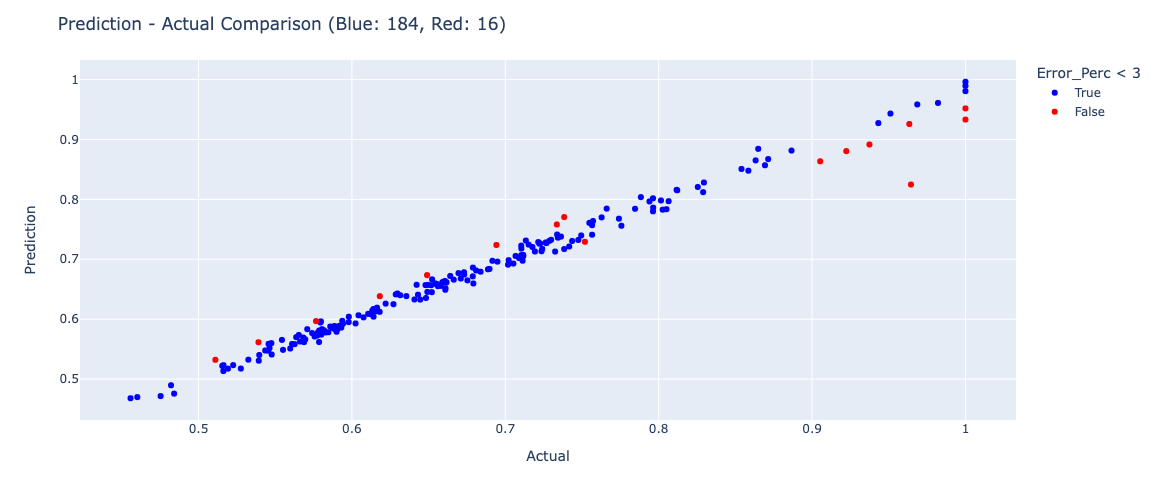

In [20]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [21]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

2021-12-13 14:46:58.090448: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-13 14:46:58.173275: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2859
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 3/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 4/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 5/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 9/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 10/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 11/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 12/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 13/1000
25/25 [====

In [22]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.00035913468499024106
neg_mean_squared_error: 0.01895084918915881
r2: 0.975052859375903


In [23]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.7360,0.7384,-0.0024,-0.3305,True
1,0.7314,0.7338,-0.0024,-0.3211,True
2,0.7161,0.7223,-0.0062,-0.8551,True
3,0.5326,0.5325,0.0002,0.0309,True
4,0.5149,0.5162,-0.0012,-0.2404,True
...,...,...,...,...,...
195,0.7085,0.7193,-0.0108,-1.5042,True
196,0.6487,0.6557,-0.0070,-1.0682,True
197,0.5827,0.5859,-0.0032,-0.5402,True
198,0.8013,0.8051,-0.0037,-0.4650,True


In [24]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

185


15

In [25]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.674886,0.680476,-0.005590,-0.704052
std,0.114309,0.120285,0.018156,2.017874
min,0.448700,0.455700,-0.150500,-15.600700
25%,0.585075,0.586800,-0.007100,-1.076775
50%,0.658600,0.660800,-0.003250,-0.505300
75%,0.737800,0.738400,-0.000100,-0.017775
max,0.986400,1.000000,0.043100,5.047100


In [26]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9972
p-Value 0.0


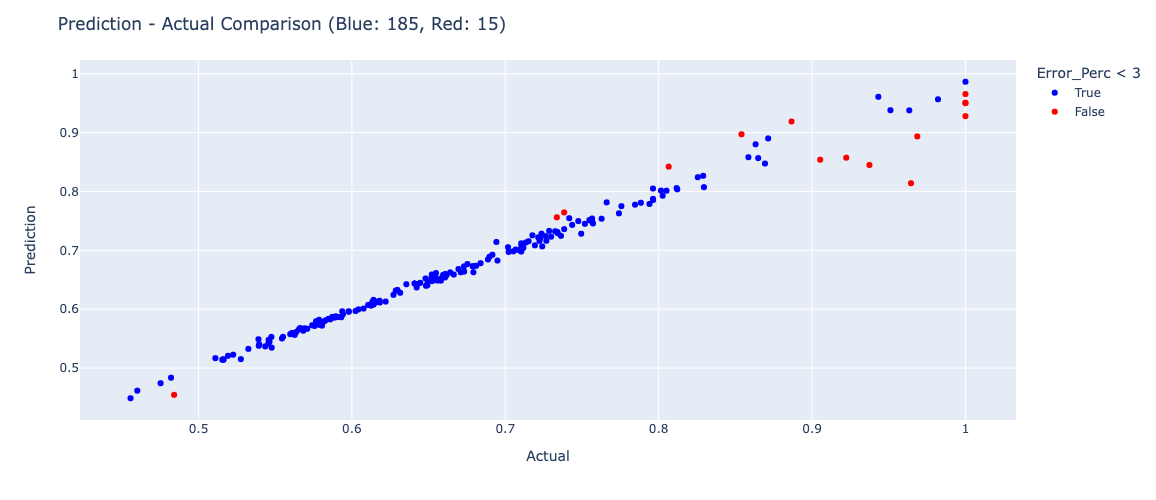

In [27]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### S22_IO_VRS 

In [334]:
X = dfs_data[1]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,115.29,412.41,117.93,810.51
DMU 2,115.93,369.50,104.26,340.73
DMU 3,111.43,418.37,110.93,300.85
DMU 4,123.87,355.78,119.90,234.46
DMU 5,106.30,525.76,100.49,256.06


In [335]:
y = dfs_es[4]
y.head()

,Efficiency
DMU,
DMU 1,0.930841
DMU 2,0.803130
DMU 3,0.833498
DMU 4,0.790839
DMU 5,0.834618


In [336]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.00038653563745596537
neg_root_mean_squared_error: -0.019205375810565396
r2: 0.8985060137384316


In [337]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.000477038880150821
neg_root_mean_squared_error: -0.022575407947978125
r2: 0.8807338580933903


In [338]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0003785126066327156
neg_root_mean_squared_error: -0.019246221242664334
r2: 0.9022456384303243


In [339]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0002946702177605067
neg_root_mean_squared_error: -0.016810098300134288
r2: 0.9221280641994427


In [340]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0001749812538190182
neg_root_mean_squared_error: -0.012938761949566627
r2: 0.9540372902091189


In [341]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0004995968373023867
neg_root_mean_squared_error: -0.02212073049282704
r2: 0.8705061799858861


In [342]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.003105607081611915
neg_root_mean_squared_error: -0.05569438672536281
r2: 0.20125772011317325


In [343]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0001759978451490483
neg_root_mean_squared_error: -0.013015835349683
r2: 0.9545908941001976


In [344]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.00010829458804975816
neg_root_mean_squared_error: -0.0100854946931403
r2: 0.9720309755050796


In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.7418,0.7453,-0.0034,-0.4568,True
1,0.8069,0.8072,-0.0003,-0.0376,True
2,0.7714,0.7667,0.0047,0.6100,True
3,0.7910,0.7951,-0.0040,-0.5081,True
4,0.8154,0.8124,0.0030,0.3661,True
...,...,...,...,...,...
195,0.7534,0.7583,-0.0049,-0.6439,True
196,0.8476,0.8507,-0.0031,-0.3648,True
197,0.8820,0.8825,-0.0005,-0.0590,True
198,0.7760,0.7816,-0.0056,-0.7150,True


In [346]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

192


8

In [347]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.819857    0.818344    0.001515    0.164367
std      0.066829    0.063465    0.009981    1.133765
min      0.684200    0.684600   -0.032400   -3.761800
25%      0.772125    0.772250   -0.003325   -0.425375
50%      0.811600    0.813250    0.000100    0.006950
75%      0.854225    0.852975    0.003800    0.491700
max      1.055100    1.000000    0.055100    5.510100


In [348]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9911
p-Value 0.0


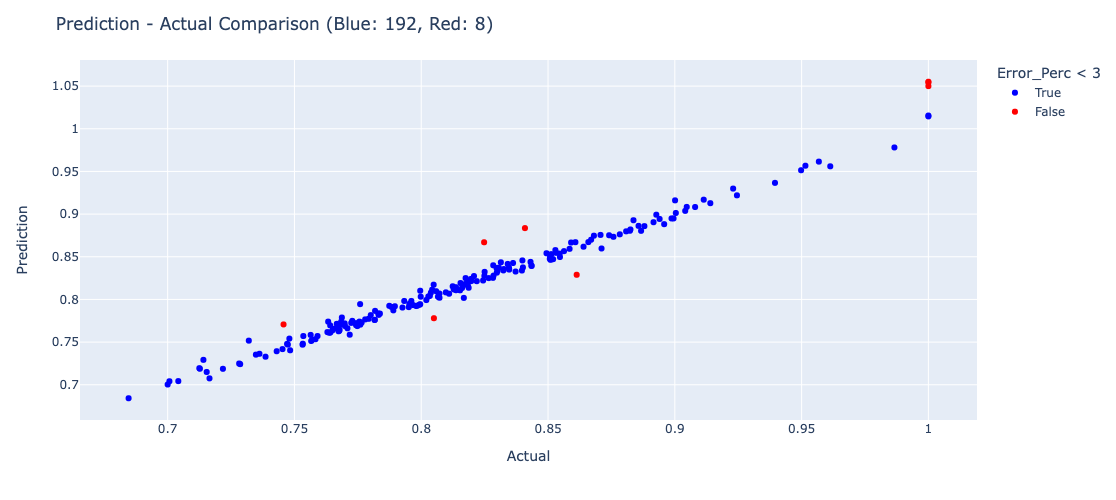

In [349]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

In [351]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.00010855256873758218
neg_mean_squared_error: 0.010418856402579996
r2: 0.9729170067377322


In [352]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.7429,0.7453,-0.0024,-0.3174,True
1,0.8023,0.8072,-0.0049,-0.6033,True
2,0.7665,0.7667,-0.0003,-0.0342,True
3,0.7979,0.7951,0.0028,0.3520,True
4,0.8082,0.8124,-0.0042,-0.5171,True
...,...,...,...,...,...
195,0.7565,0.7583,-0.0018,-0.2333,True
196,0.8405,0.8507,-0.0102,-1.2000,True
197,0.8867,0.8825,0.0042,0.4728,True
198,0.7770,0.7816,-0.0045,-0.5774,True


In [353]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

195


5

In [354]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.813182,0.818344,-0.005162,-0.610304
std,0.061367,0.063465,0.009068,1.049577
min,0.685600,0.684600,-0.050500,-5.053900
25%,0.769625,0.772250,-0.009025,-1.087400
50%,0.807150,0.813250,-0.004300,-0.531200
75%,0.846575,0.852975,-0.000375,-0.046875
max,0.994500,1.000000,0.016100,1.824600


In [355]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9907
p-Value 0.0


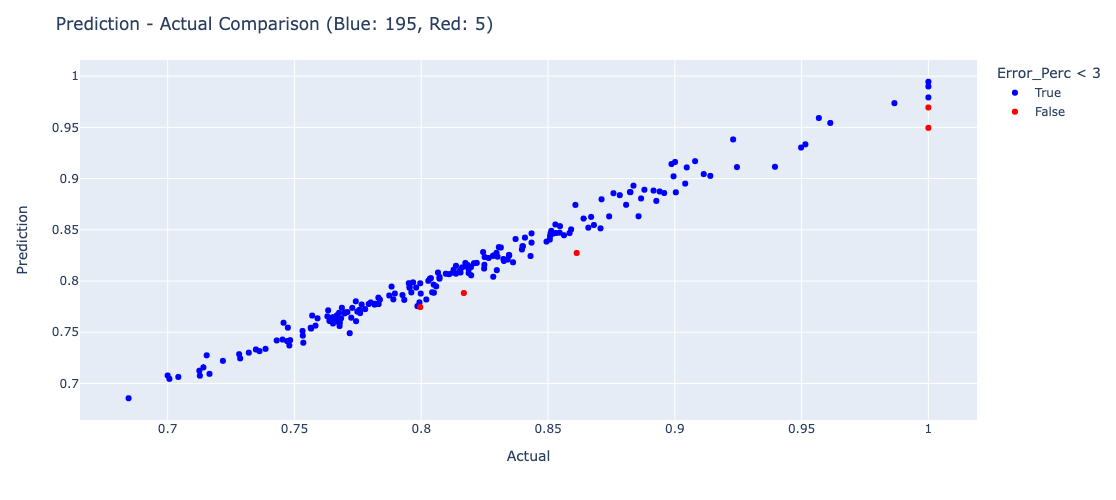

In [356]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### US55_IO_VRS 

In [357]:
X = dfs_data[2]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,262.93,368.02,311.81,369.14,158.95,373.54,165.68,625.17,620.95,193.29
DMU 2,267.81,449.71,300.84,194.85,195.14,312.06,154.78,360.41,510.36,291.05
DMU 3,315.52,467.64,249.35,285.36,251.24,224.69,214.17,333.71,378.87,180.60
DMU 4,273.62,219.07,245.76,379.23,164.55,345.12,200.72,466.64,560.33,172.56
DMU 5,323.65,298.21,369.23,380.81,117.59,406.04,218.08,513.41,583.01,152.26


In [358]:
y = dfs_es[8]
y.head()

,Efficiency
DMU,
DMU 1,0.907674
DMU 2,0.873908
DMU 3,0.739374
DMU 4,0.966396
DMU 5,0.984420


In [359]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002436713177744296
neg_root_mean_squared_error: -0.049315247895884255
r2: 0.606325923154546


In [360]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.004988711949348984
neg_root_mean_squared_error: -0.06996172420948431
r2: 0.1633323094588966


In [361]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002944484977517348
neg_root_mean_squared_error: -0.05421718343108302
r2: 0.5244282238246727


In [362]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0021919068851524474
neg_root_mean_squared_error: -0.04629436824572234
r2: 0.6571300130133343


In [363]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.001611560024906543
neg_root_mean_squared_error: -0.040088499468691516
r2: 0.7406459643686587


In [364]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0034624085692240266
neg_root_mean_squared_error: -0.05878355566144139
r2: 0.44259809788438675


In [365]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.004043931168079254
neg_root_mean_squared_error: -0.06350995298513483
r2: 0.34932712280426187


In [366]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0016401846559234725
neg_root_mean_squared_error: -0.04042260564393907
r2: 0.7370437585436932


In [367]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0009530136197947418
neg_root_mean_squared_error: -0.030832886103533286
r2: 0.8465176657124862


In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.8264,0.8217,0.0047,0.5763,True
1,0.9161,0.9858,-0.0697,-7.0739,False
2,0.9314,0.9323,-0.0008,-0.0882,True
3,0.8843,0.8743,0.0099,1.1353,True
4,0.7906,0.8009,-0.0102,-1.2756,True
...,...,...,...,...,...
195,0.8585,0.8159,0.0426,5.2198,False
196,1.0705,1.0000,0.0705,7.0451,False
197,0.8612,0.8486,0.0125,1.4766,True
198,0.8712,0.8669,0.0043,0.4930,True


In [369]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

163


37

In [370]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.900001    0.900382   -0.000384   -0.022008
std      0.079339    0.077497    0.025406    2.691340
min      0.716200    0.726400   -0.097300   -9.732300
25%      0.838950    0.835975   -0.013525   -1.586050
50%      0.895900    0.898850    0.000750    0.081850
75%      0.953800    0.986000    0.013675    1.490300
max      1.095100    1.000000    0.095100    9.506100


In [371]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9645
p-Value 0.0


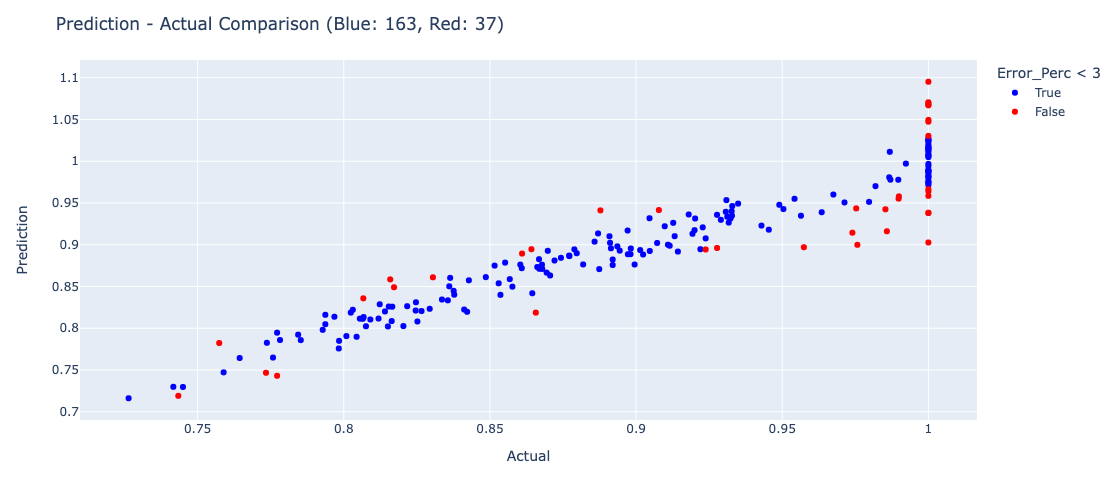

In [372]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

In [374]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.0007094033458272861
neg_mean_squared_error: 0.026634626819748874
r2: 0.8812831065440904


In [375]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.8059,0.8217,-0.0158,-1.9191,True
1,0.9406,0.9858,-0.0452,-4.5861,False
2,0.9744,0.9323,0.0421,4.5181,False
3,0.8988,0.8743,0.0245,2.8030,True
4,0.8464,0.8009,0.0455,5.6824,False
...,...,...,...,...,...
195,0.8564,0.8159,0.0405,4.9596,False
196,1.0004,1.0000,0.0004,0.0392,True
197,0.8372,0.8486,-0.0114,-1.3490,True
198,0.8489,0.8669,-0.0180,-2.0769,True


In [376]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

151


49

In [377]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.901396,0.900382,0.001013,0.204716
std,0.072605,0.077497,0.026680,3.009813
min,0.748600,0.726400,-0.082900,-9.161200
25%,0.841050,0.835975,-0.012200,-1.323200
50%,0.898600,0.898850,0.000400,0.036650
75%,0.968350,0.986000,0.014050,1.667350
max,1.004000,1.000000,0.090800,10.543900


In [378]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9353
p-Value 0.0


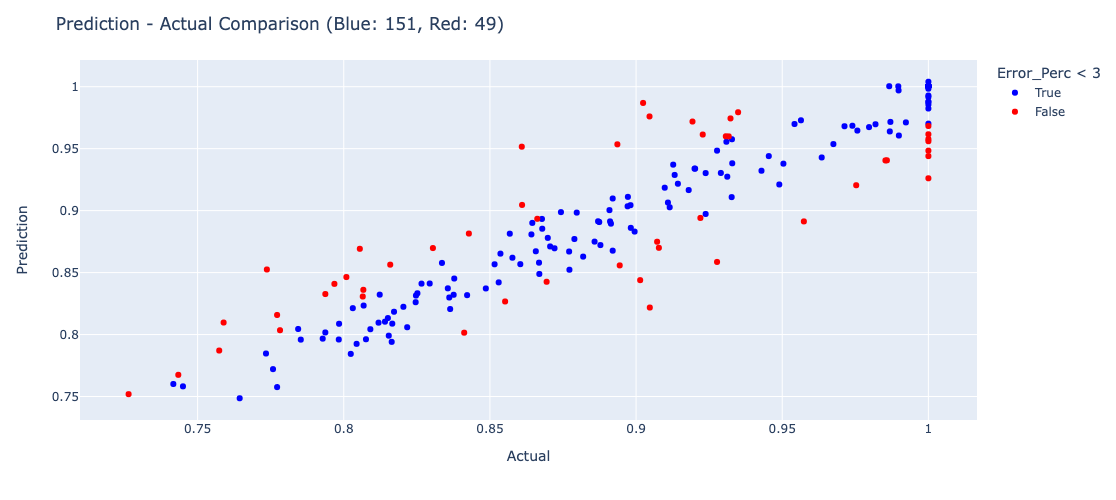

In [379]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### S55_IO_VRS 

In [380]:
X = dfs_data[3]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,131.39,286.47,202.38,40.80,111.03,120.31,296.53,79.58,38.23,647.46
DMU 2,142.72,264.52,279.50,22.60,254.68,118.96,282.88,61.63,24.77,548.66
DMU 3,97.01,272.04,159.24,13.35,295.80,123.64,386.05,75.11,40.29,638.46
DMU 4,105.69,305.87,289.20,24.67,251.61,113.56,329.53,76.88,29.79,393.48
DMU 5,103.88,295.52,335.36,28.92,165.44,149.03,383.41,73.48,36.82,453.68


In [381]:
y = dfs_es[12]
y.head()

,Efficiency
DMU,
DMU 1,0.923897
DMU 2,0.841657
DMU 3,1.000000
DMU 4,0.737903
DMU 5,0.827554


In [382]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.001821633578637572
neg_root_mean_squared_error: -0.04256147605530848
r2: 0.6763417523205554


In [383]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.003226016035945413
neg_root_mean_squared_error: -0.05632902042114485
r2: 0.428302666695169


In [384]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0021544661149984997
neg_root_mean_squared_error: -0.04634122244318924
r2: 0.616178279499972


In [385]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.001421973515997682
neg_root_mean_squared_error: -0.03754411918469842
r2: 0.7429678538905197


In [386]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0008914425498355863
neg_root_mean_squared_error: -0.029832772126577572
r2: 0.84194440851608


In [387]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.002263283175834343
neg_root_mean_squared_error: -0.04749395737674551
r2: 0.5983451380949482


In [388]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.004006311200542106
neg_root_mean_squared_error: -0.06328148982016958
r2: 0.28833874130678516


In [389]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0010069757657205371
neg_root_mean_squared_error: -0.031517036414182326
r2: 0.8203698183876689


In [390]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.000626666790819156
neg_root_mean_squared_error: -0.025023261777970714
r2: 0.8887048593494129


In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.9195,1.0000,-0.0805,-8.0544,False
1,0.9286,0.9289,-0.0002,-0.0245,True
2,0.8934,0.8965,-0.0031,-0.3440,True
3,0.8791,0.8846,-0.0055,-0.6253,True
4,0.7863,0.7952,-0.0090,-1.1265,True
...,...,...,...,...,...
195,1.0404,1.0000,0.0404,4.0382,False
196,0.7255,0.7313,-0.0058,-0.7912,True
197,0.8861,0.8686,0.0175,2.0203,True
198,0.8754,0.8566,0.0188,2.1925,True


In [392]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

162


38

In [393]:
print(res.describe())

       Prediction      Actual        Diff  Error_Perc
count  200.000000  200.000000  200.000000  200.000000
mean     0.910258    0.908535    0.001724    0.195340
std      0.080441    0.076209    0.026979    2.808444
min      0.720900    0.731300   -0.085500   -8.551000
25%      0.853100    0.844800   -0.009825   -1.102725
50%      0.914500    0.915950    0.000200    0.019550
75%      0.971425    0.994925    0.013550    1.481850
max      1.120000    1.000000    0.120000   11.997200


In [394]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9559
p-Value 0.0


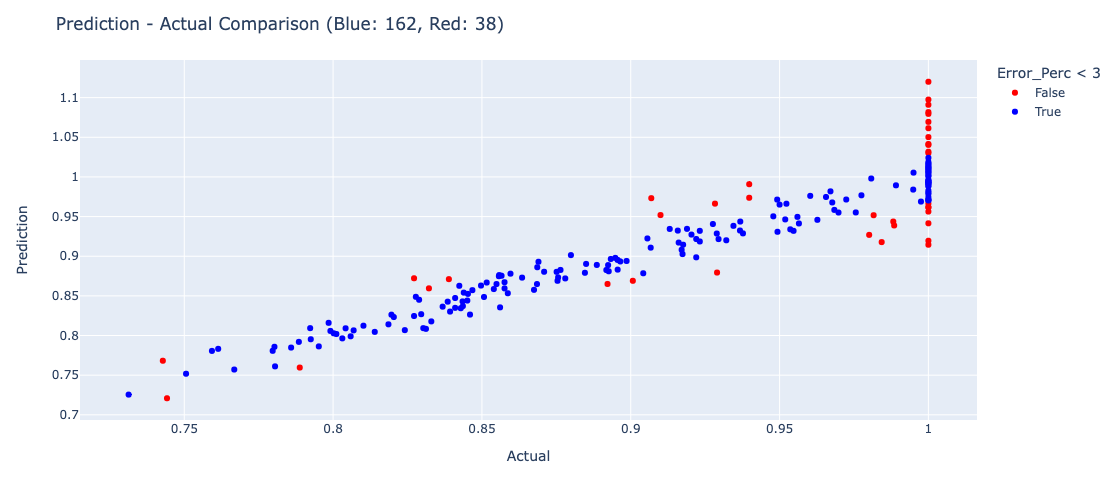

In [395]:
fig = px.scatter(res, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

In [397]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.0008861374833626357
neg_mean_squared_error: 0.029768061464640852
r2: 0.8466576090957032


In [398]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Prediction"] = pd.Series(prediction.ravel())
res_ann["Actual"] = y_test.values
res_ann["Diff"] = res_ann.Prediction - res_ann.Actual
res_ann["Error_Perc"] = ((res_ann.Prediction - res_ann.Actual) / res_ann.Actual) * 100 
res_ann["Error_Perc < 3"] = np.abs(res_ann["Error_Perc"]) < 3 
res_ann = res_ann.round(4)

res_ann

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
0,0.9300,1.0000,-0.0700,-6.9963,False
1,0.9391,0.9289,0.0102,1.0967,True
2,0.9049,0.8965,0.0084,0.9372,True
3,0.8982,0.8846,0.0135,1.5309,True
4,0.8052,0.7952,0.0100,1.2576,True
...,...,...,...,...,...
195,1.0005,1.0000,0.0005,0.0481,True
196,0.7384,0.7313,0.0072,0.9785,True
197,0.8858,0.8686,0.0172,1.9839,True
198,0.8590,0.8566,0.0023,0.2725,True


In [399]:
blue = res_ann["Error_Perc < 3"].sum()
print(blue)
red = len(res_ann["Error_Perc < 3"]) - (res_ann["Error_Perc < 3"].sum())
red

142


58

In [400]:
res_ann.describe()

,Prediction,Actual,Diff,Error_Perc
count,200.000000,200.000000,200.000000,200.000000
mean,0.902244,0.908535,-0.006291,-0.624597
std,0.073950,0.076209,0.029168,3.154393
min,0.732000,0.731300,-0.129500,-12.947900
25%,0.844350,0.844800,-0.016700,-1.913900
50%,0.902550,0.915950,-0.002650,-0.285600
75%,0.976300,0.994925,0.006525,0.760450
max,1.000700,1.000000,0.087400,9.632800


In [401]:
rho, p = stats.spearmanr(res_ann.Prediction, res_ann.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9197
p-Value 0.0


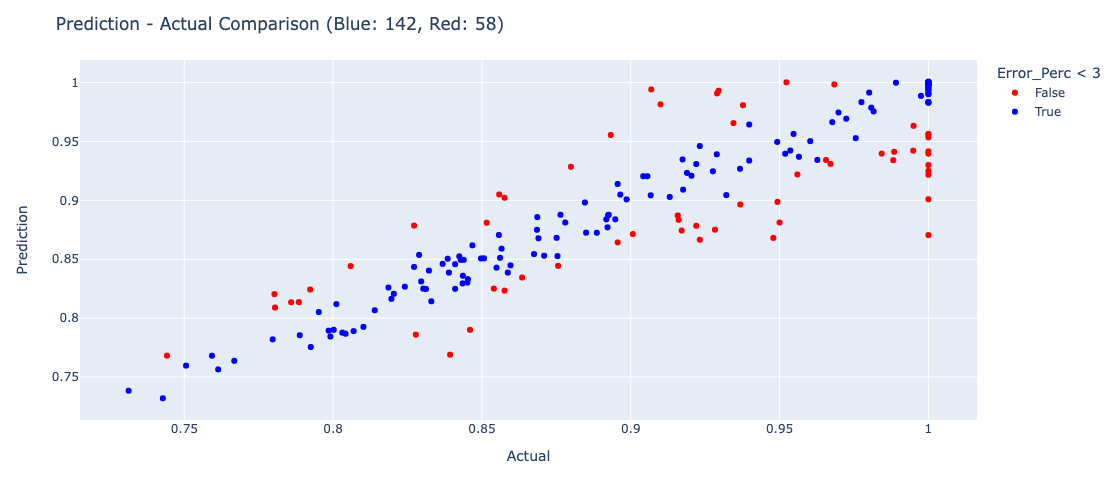

In [402]:
fig = px.scatter(res_ann, x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()